# Particle Swarm Optimization

Using particle swarm optimization to optimize the hyperparameters of a random forest classifier to predict brain tumor classification.

In [9]:
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load Dataset
def load_data(folder_path):
    X = []
    y = []
    for class_name in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_name)
        if os.path.isdir(class_path):
            for file_name in os.listdir(class_path):
                file_path = os.path.join(class_path, file_name)
                try:
                    img = Image.open(file_path).convert('L')  # 'L' = grayscale
                    img = img.resize((64, 64))  # Resize for consistency
                    img_array = np.array(img).flatten()
                    X.append(img_array)
                    y.append(class_name)
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")
    return np.array(X), np.array(y)

X_train, y_train = load_data('brain_tumor_mri/Training')
X_test, y_test = load_data('brain_tumor_mri/Testing')

In [11]:
# Encode Labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [43]:
# Random Forest Classification
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train_encoded)

RandomForestClassifier(random_state=42)

In [44]:
# Make predictions
y_pred = rf.predict(X_test)

print("Accuracy: ", accuracy_score(y_test_encoded, y_pred))
print(classification_report(y_test_encoded, y_pred))

Accuracy:  0.9443173150266971
              precision    recall  f1-score   support

           0       0.97      0.85      0.90       300
           1       0.87      0.93      0.90       306
           2       0.98      1.00      0.99       405
           3       0.96      0.98      0.97       300

    accuracy                           0.94      1311
   macro avg       0.94      0.94      0.94      1311
weighted avg       0.95      0.94      0.94      1311



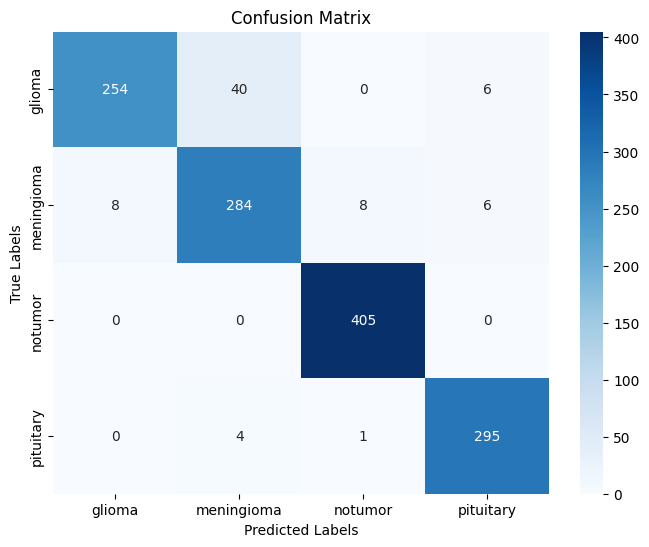

In [45]:
# Display results
cm = confusion_matrix(y_test_encoded, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [46]:
from sklearn.tree import export_text

tree = rf.estimators_[0]
feature_names = [f"pixel_{i}" for i in range(X_train.shape[1])]
class_names = le.classes_
tree_text = export_text(tree, class_names=class_names, feature_names=feature_names)
print(tree_text)

|--- pixel_2027 <= 95.50
|   |--- pixel_1976 <= 0.50
|   |   |--- pixel_3379 <= 0.50
|   |   |   |--- pixel_3590 <= 1.00
|   |   |   |   |--- pixel_871 <= 16.50
|   |   |   |   |   |--- pixel_2385 <= 88.50
|   |   |   |   |   |   |--- class: pituitary
|   |   |   |   |   |--- pixel_2385 >  88.50
|   |   |   |   |   |   |--- class: meningioma
|   |   |   |   |--- pixel_871 >  16.50
|   |   |   |   |   |--- pixel_3044 <= 43.00
|   |   |   |   |   |   |--- class: glioma
|   |   |   |   |   |--- pixel_3044 >  43.00
|   |   |   |   |   |   |--- class: notumor
|   |   |   |--- pixel_3590 >  1.00
|   |   |   |   |--- class: glioma
|   |   |--- pixel_3379 >  0.50
|   |   |   |--- pixel_436 <= 0.50
|   |   |   |   |--- class: notumor
|   |   |   |--- pixel_436 >  0.50
|   |   |   |   |--- pixel_627 <= 4.50
|   |   |   |   |   |--- pixel_2681 <= 2.50
|   |   |   |   |   |   |--- pixel_3607 <= 134.50
|   |   |   |   |   |   |   |--- pixel_1441 <= 2.50
|   |   |   |   |   |   |   |   |--- class: p

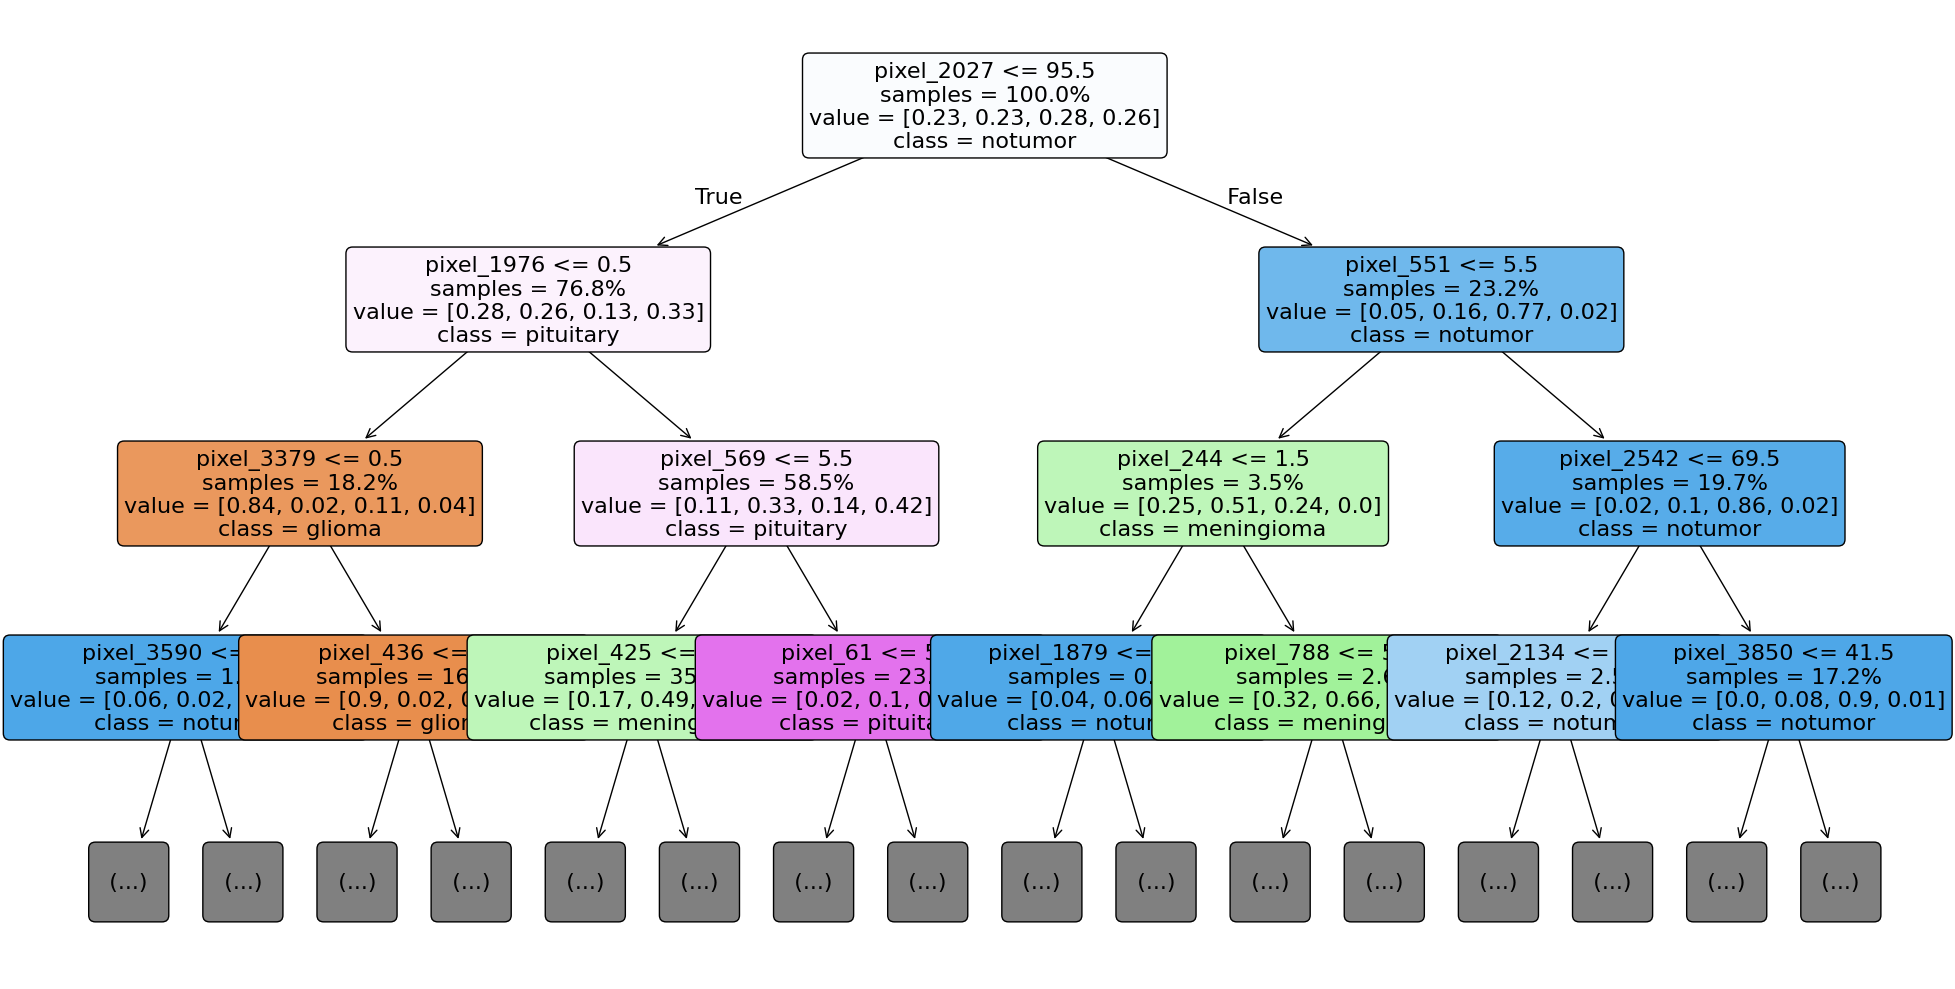

In [47]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          rounded=True,
          fontsize=16, 
          impurity=False,
          precision=2,
          proportion=True,
          max_depth=3)
plt.tight_layout()
plt.show()